In [17]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from numpy.fft import fft

In [18]:
fm = 8000                                 # Freqüència de mostratge en Hz
Tm = 1 / fm
N = 5000
x_r, fm = sf.read('so_2KHz.wav')
L = len(x_r)

In [19]:
X_r = fft(x_r, N)
X_r_abs = np.abs(X_r)
f_0_index = np.argmax(X_r_abs[1:]) + 1    # Trobem l'index de la freq. amb més presència (Obviem la freq. 0 i sumem 1 per compensar)
f_0 = (f_0_index / N) * fm                # Calculem la freq. segons la fm                        
fx = f_0

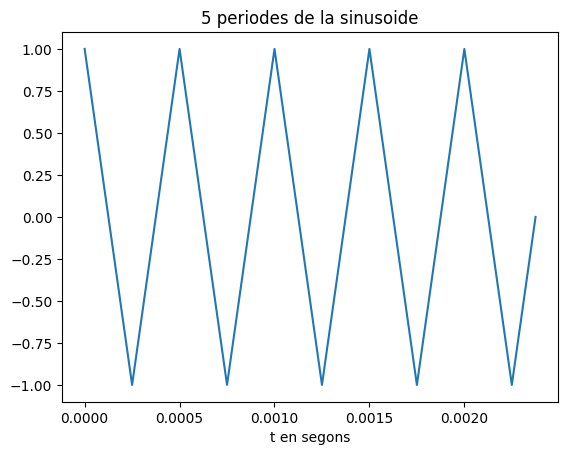

In [20]:
Tx = 1/fx
t = Tm * np.arange(L)                     # Període del senyal
Ls = int(fm * 5 * Tx)                     # Nombre de mostres corresponents a 5 períodes de la sinusoide

plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls], x_r[0:Ls])              # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show() 

In [21]:
X = fft(x_r[0 : Ls], N)               # Càlcul de la transformada de 5 períodes de la sinusoide

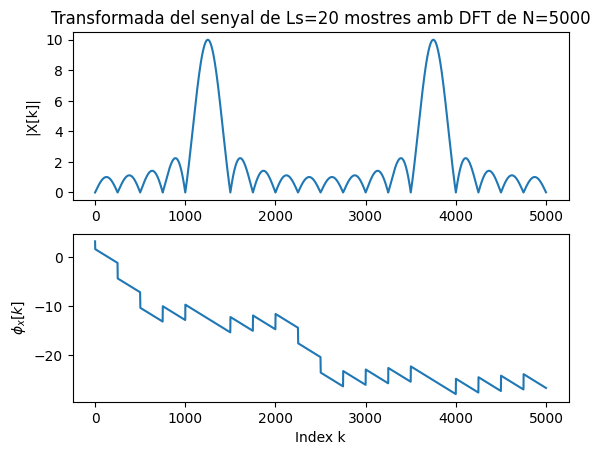

In [22]:
k = np.arange(N)                      # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(k,abs(X))                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()